# Imports

In [109]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
# https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1

# Load data

In [18]:
data = pickle.load(open('credit_screening.csv', 'rb'))
print(data.shape)
data.head()

(653, 38)


,Male,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,...,Ethnicity_dd,Ethnicity_ff,Ethnicity_h,Ethnicity_j,Ethnicity_n,Ethnicity_o,Ethnicity_v,Ethnicity_z,Citizen_p,Citizen_s
0,1,30.83,0.000,1.25,1,1,1,0,202,0,...,0,0,0,0,0,0,1,0,0,0
1,0,58.67,4.460,3.04,1,1,6,0,43,560,...,0,0,1,0,0,0,0,0,0,0
2,0,24.50,0.500,1.50,1,0,0,0,280,824,...,0,0,1,0,0,0,0,0,0,0
3,1,27.83,1.540,3.75,1,1,5,1,100,3,...,0,0,0,0,0,0,1,0,0,0
4,1,20.17,5.625,1.71,1,0,0,0,120,0,...,0,0,0,0,0,0,1,0,0,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 38 columns):
Male                 653 non-null int64
Age                  653 non-null float64
Debt                 653 non-null float64
YearsEmployed        653 non-null float64
PriorDefault         653 non-null int64
Employed             653 non-null int64
CreditScore          653 non-null int64
DriversLicense       653 non-null int64
ZipCode              653 non-null int64
Income               653 non-null int64
Approved             653 non-null int64
Married_u            653 non-null uint8
Married_y            653 non-null uint8
BankCustomer_gg      653 non-null uint8
BankCustomer_p       653 non-null uint8
EducationLevel_c     653 non-null uint8
EducationLevel_cc    653 non-null uint8
EducationLevel_d     653 non-null uint8
EducationLevel_e     653 non-null uint8
EducationLevel_ff    653 non-null uint8
EducationLevel_i     653 non-null uint8
EducationLevel_j     653 non-null uint8
Education

In [42]:
numeric_data = []
for col in data.columns:
    nunique = data[col].nunique()
    if nunique > 20:
        numeric_data.append(col)
        print(col, '\t', nunique , '\tCONTINUOUS\t', data[col].unique().min(), '\t', data[col].unique().max())

Age 	 340 	CONTINUOUS	 13.75 	 76.75
Debt 	 213 	CONTINUOUS	 0.0 	 28.0
YearsEmployed 	 131 	CONTINUOUS	 0.0 	 28.5
CreditScore 	 23 	CONTINUOUS	 0 	 67
ZipCode 	 164 	CONTINUOUS	 0 	 2000
Income 	 229 	CONTINUOUS	 0 	 100000


# Distribution & Count

## functions

In [78]:
def describe_feature(df, col):
    print('******', col, '******')
    print(df[col].describe())

In [79]:
def viz_count(df, col):
    plt.figure(figsize=(15,7))
    plt.scatter(range(df.shape[0]), np.sort(df[col].values))
    plt.xlabel('count')
    plt.ylabel(col)
    plt.title(col+" Count")
    sns.despine()

In [80]:
def viz_distribution(df, col):
    plt.figure(figsize=(15,7))
    sns.distplot(df[col])
    plt.title("Distribution of "+col)
    sns.despine()    

## Age feature

In [81]:
describe_feature(data, numeric_data[0])

****** Age ******
count    653.000000
mean      31.503813
std       11.838267
min       13.750000
25%       22.580000
50%       28.420000
75%       38.250000
max       76.750000
Name: Age, dtype: float64


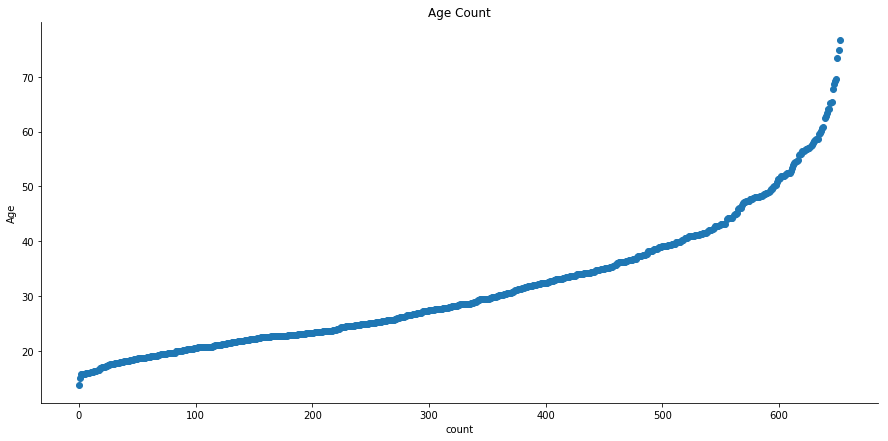

In [82]:
viz_count(data, numeric_data[0])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/janniechang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


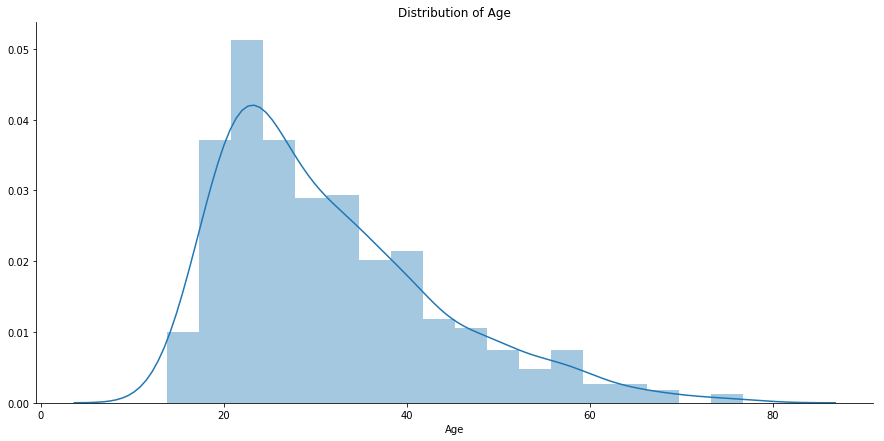

In [83]:
viz_distribution(data, numeric_data[0])

## Debt feature

In [84]:
describe_feature(data, numeric_data[1])

****** Debt ******
count    653.000000
mean       4.829533
std        5.027077
min        0.000000
25%        1.040000
50%        2.835000
75%        7.500000
max       28.000000
Name: Debt, dtype: float64


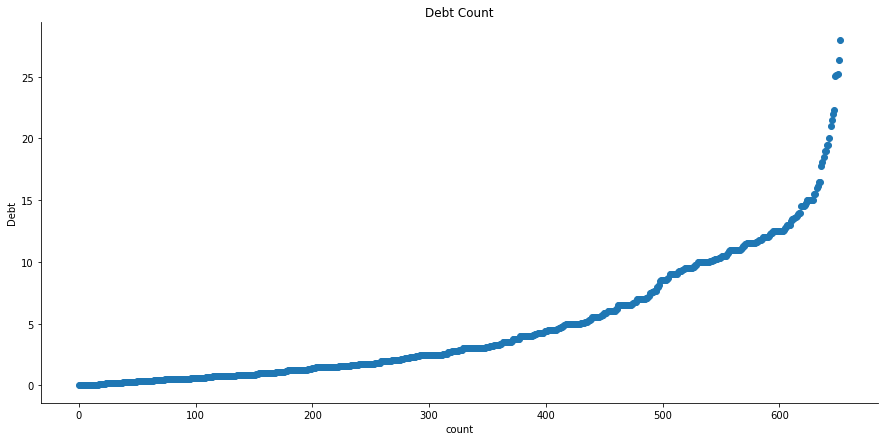

In [85]:
viz_count(data, numeric_data[1])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/janniechang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


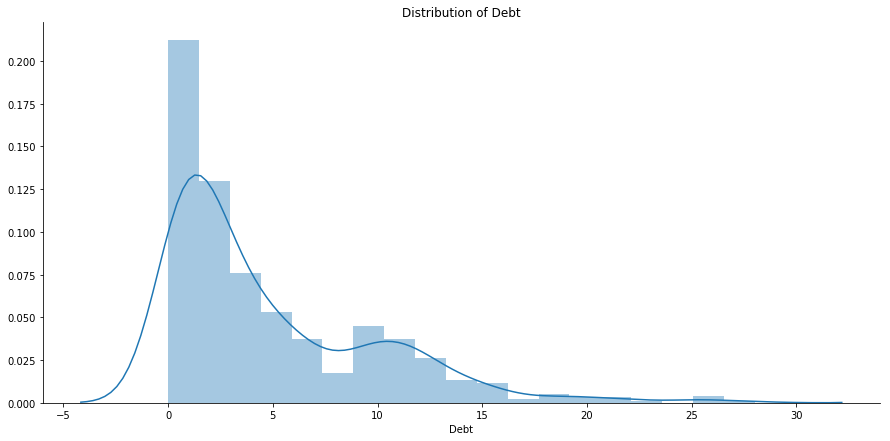

In [86]:
viz_distribution(data, numeric_data[1])

## YearsEmployed feature

In [49]:
describe_feature(data, numeric_data[2])

****** YearsEmployed ******
count    653.000000
mean       2.244296
std        3.371120
min        0.000000
25%        0.165000
50%        1.000000
75%        2.625000
max       28.500000
Name: YearsEmployed, dtype: float64


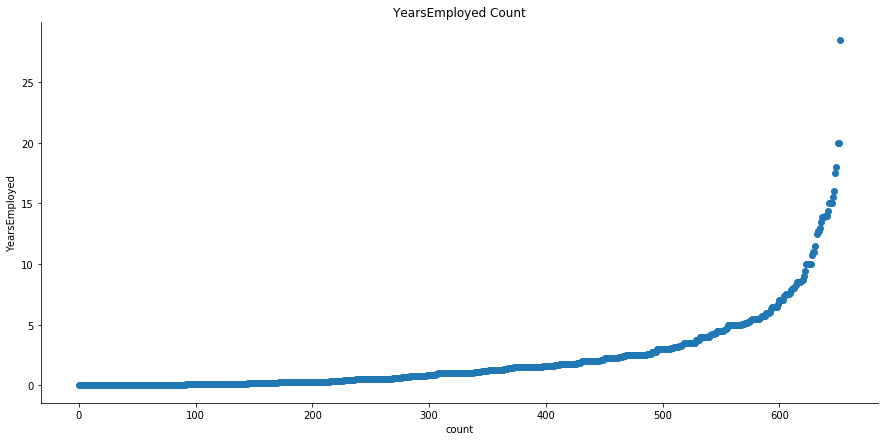

In [87]:
viz_count(data, numeric_data[2])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/janniechang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


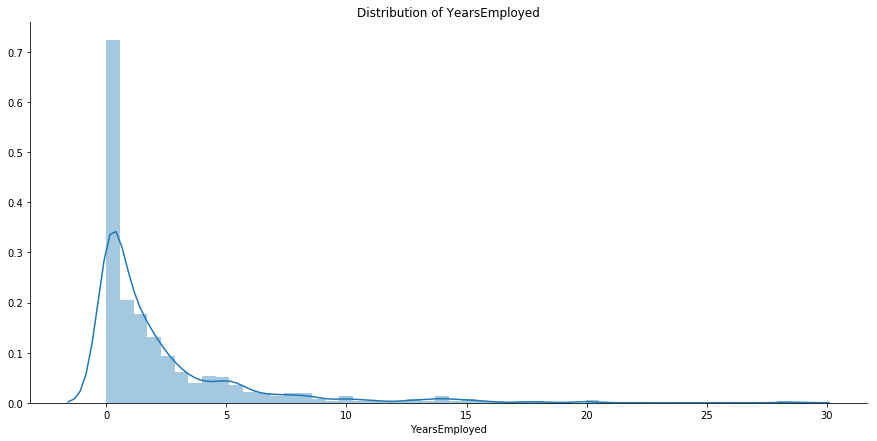

In [88]:
viz_distribution(data, numeric_data[2])

## CreditScore feature

In [52]:
describe_feature(data, numeric_data[3])

****** CreditScore ******
count    653.000000
mean       2.502297
std        4.968497
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       67.000000
Name: CreditScore, dtype: float64


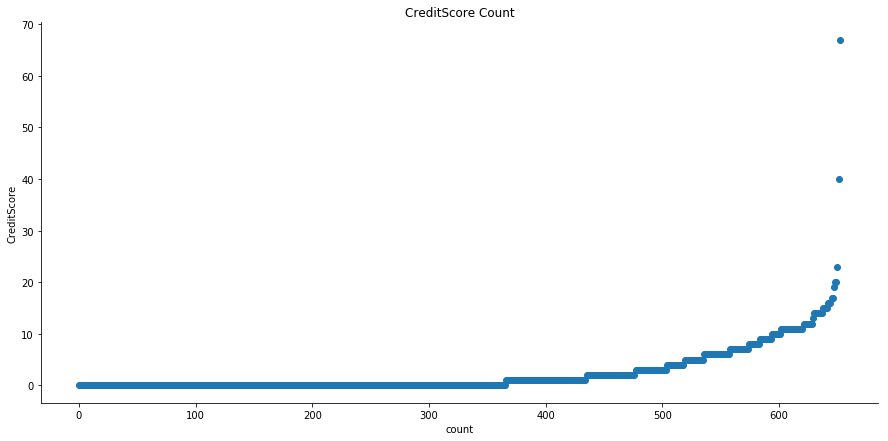

In [89]:
viz_count(data, numeric_data[3])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/janniechang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


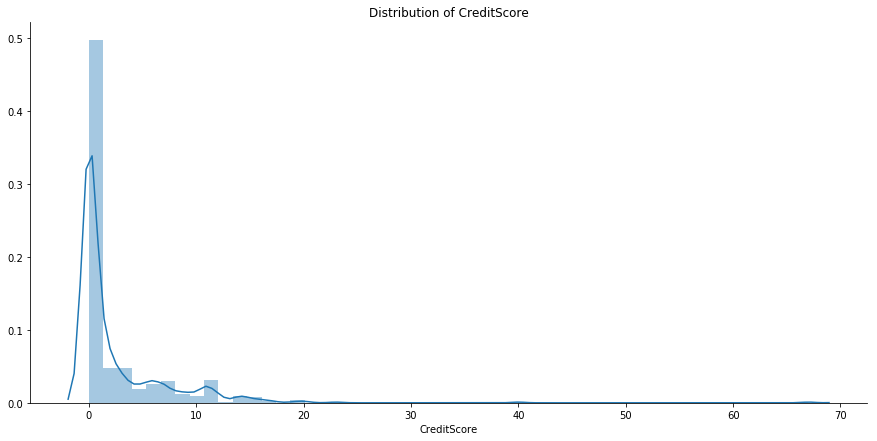

In [90]:
viz_distribution(data, numeric_data[3])

## ZipCode feature

In [55]:
describe_feature(data, numeric_data[4])

****** ZipCode ******
count     653.000000
mean      180.359877
std       168.296811
min         0.000000
25%        73.000000
50%       160.000000
75%       272.000000
max      2000.000000
Name: ZipCode, dtype: float64


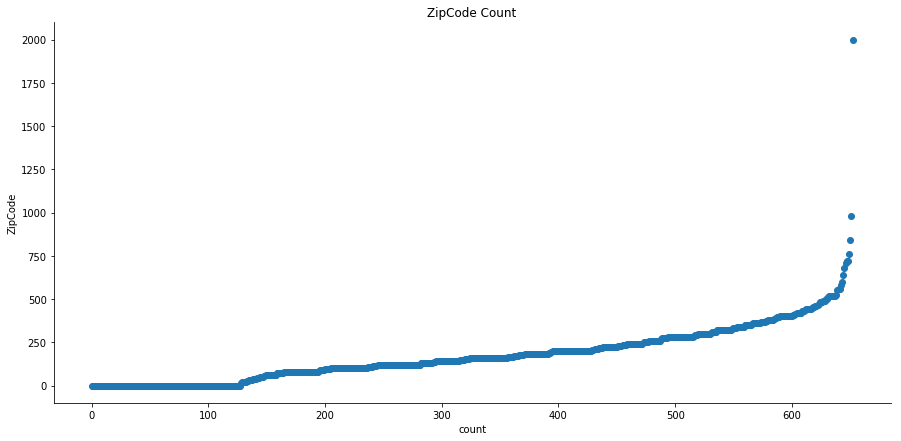

In [91]:
viz_count(data, numeric_data[4])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/janniechang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


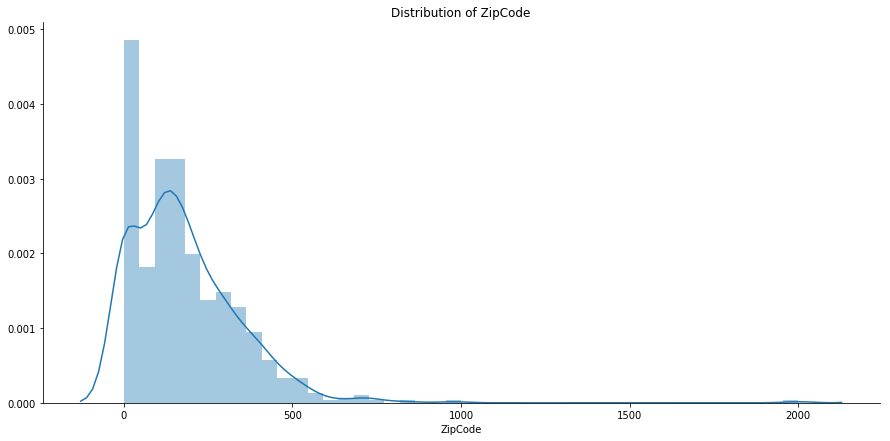

In [92]:
viz_distribution(data, numeric_data[4])

## Income feature

In [58]:
describe_feature(data, numeric_data[5])

****** Income ******
count       653.000000
mean       1013.761103
std        5253.278504
min           0.000000
25%           0.000000
50%           5.000000
75%         400.000000
max      100000.000000
Name: Income, dtype: float64


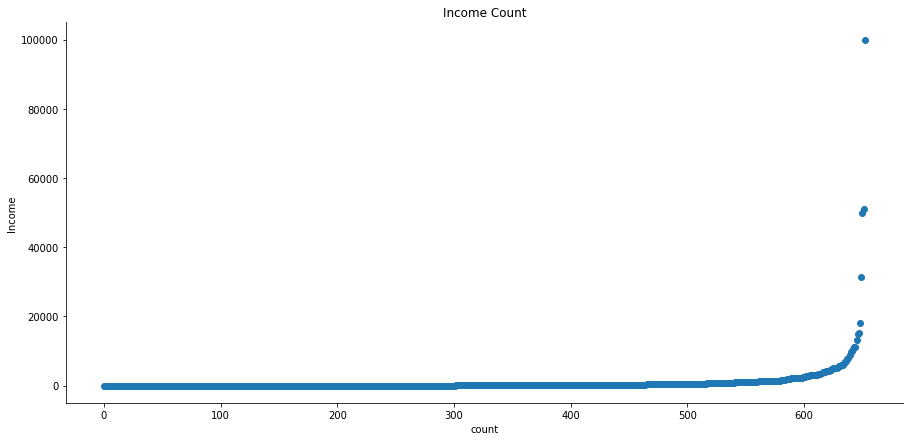

In [93]:
viz_count(data, numeric_data[5])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/janniechang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


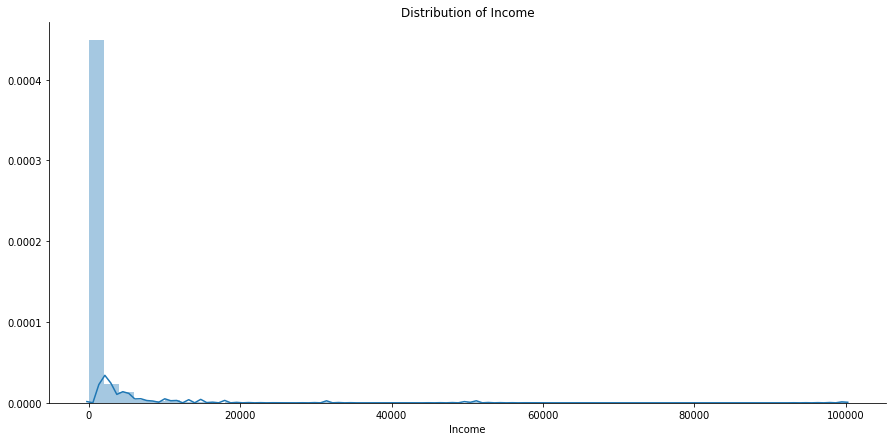

In [94]:
viz_distribution(data, numeric_data[5])

# Isolation Forest
Isolation Forest is an algorithm to detect outliers that returns the anomaly score of each sample using the IsolationForest algorithm which is based on the fact that anomalies are data points that are few and different.

## Functions

In [133]:
col = 'CreditScore'
# isolation_forest = IsolationForest(n_estimators=100)
# isolation_forest.fit(data[col].values.reshape(-1, 1))
train, test = train_test_split(data[col].values)
np.sort(test).reshape(-1, 1)

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],

In [117]:
def score_linspace_anomaly(df, col):
    isolation_forest = IsolationForest(n_estimators=100)
    isolation_forest.fit(df[col].values.reshape(-1, 1))
    xx = np.linspace(df[col].min(), df[col].max(), len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    plt.figure(figsize=(15,7))
    plt.plot(xx, anomaly_score, label='Anomaly Score')
    plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                    where=outlier==-1, color='r', alpha=.4, label='Outlier Region')
    plt.legend()
    plt.ylabel('Anomaly Score')
    plt.xlabel(col)
    plt.show()

In [134]:
def score_split_anomaly(df, col):
    train, test = train_test_split(df[col].values, test_size=0.25, random_state=42)
    
    isolation_forest = IsolationForest(n_estimators=100)
    isolation_forest.fit(np.sort(train).reshape(-1, 1))
    xx = np.sort(test).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    plt.figure(figsize=(15,7))
    plt.plot(xx, anomaly_score, label='Anomaly Score')
    plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                    where=outlier==-1, color='r', alpha=.4, label='Outlier Region')
    plt.legend()
    plt.ylabel('Anomaly Score')
    plt.xlabel(col)
    plt.show();

## Age

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


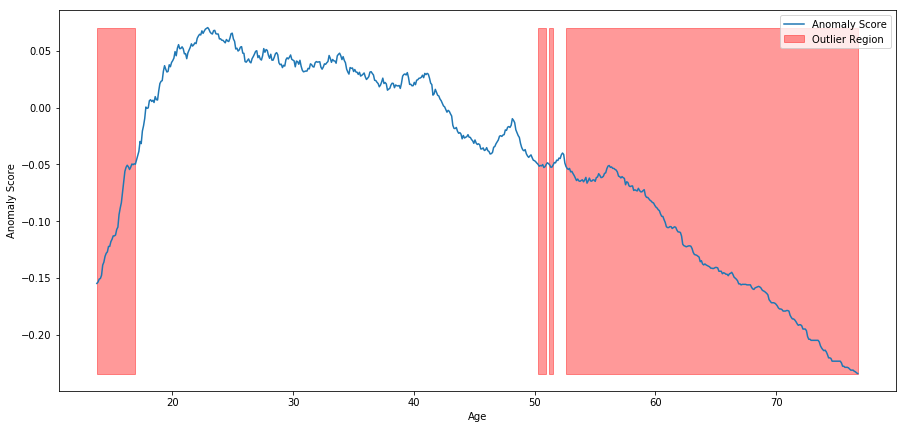

In [123]:
score_linspace_anomaly(data, numeric_data[0])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


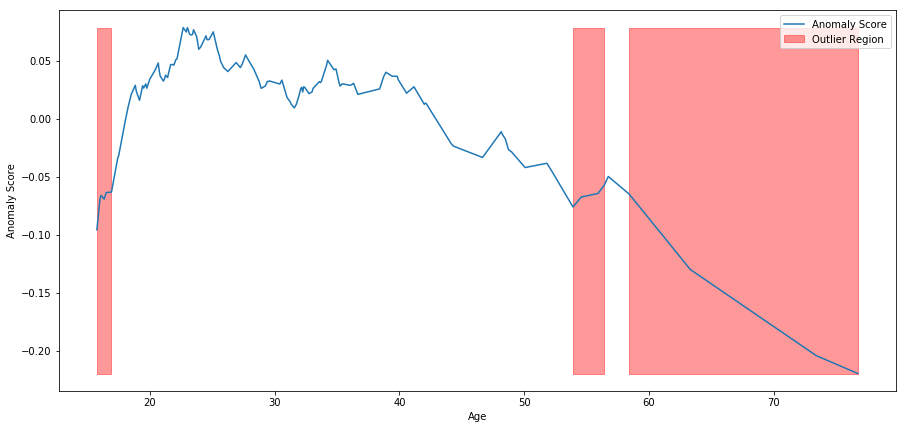

In [135]:
score_split_anomaly(data, numeric_data[0])

## Debt

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


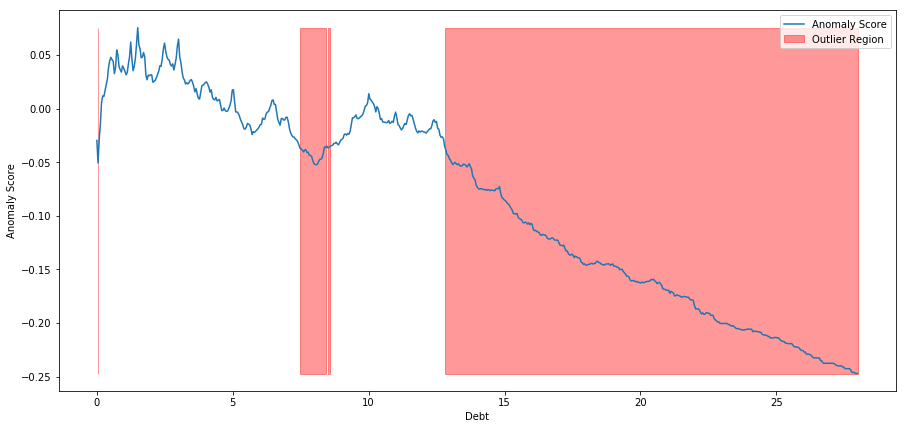

In [136]:
score_linspace_anomaly(data, numeric_data[1])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


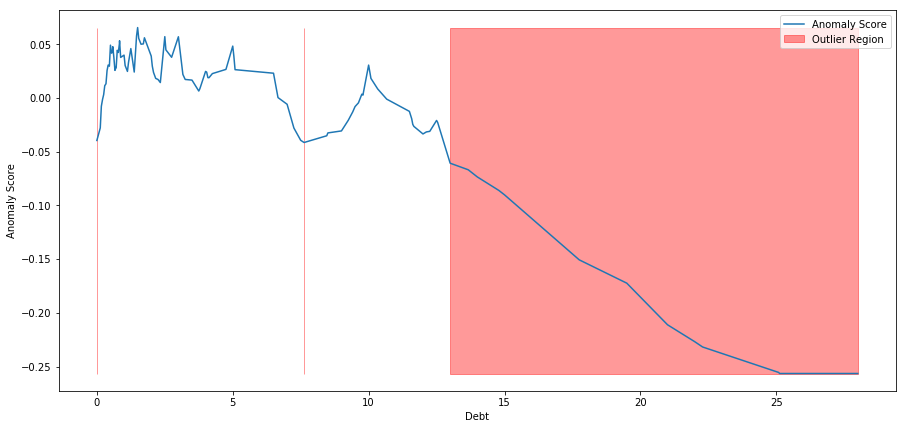

In [137]:
score_split_anomaly(data, numeric_data[1])

## YearsEmployed

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


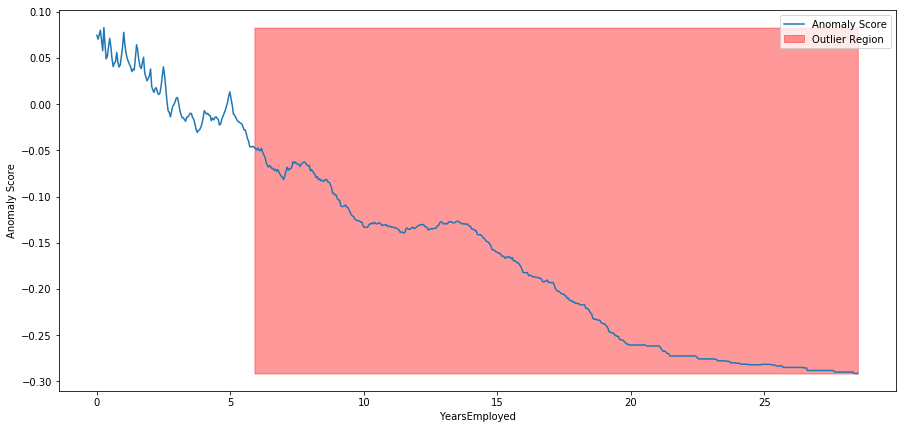

In [138]:
score_linspace_anomaly(data, numeric_data[2])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


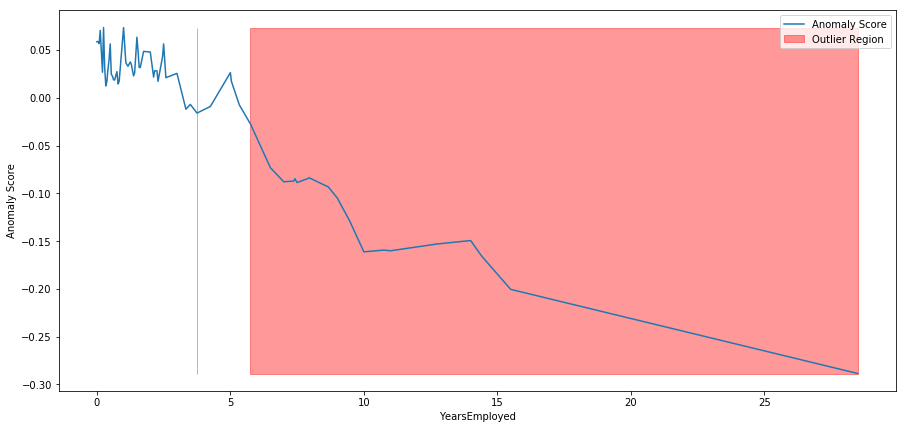

In [139]:
score_split_anomaly(data, numeric_data[2])

## CreditScore

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


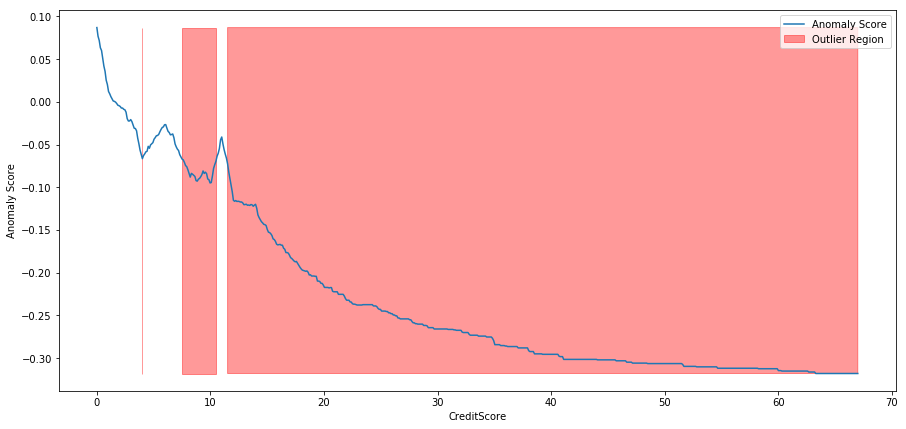

In [140]:
score_linspace_anomaly(data, numeric_data[3])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


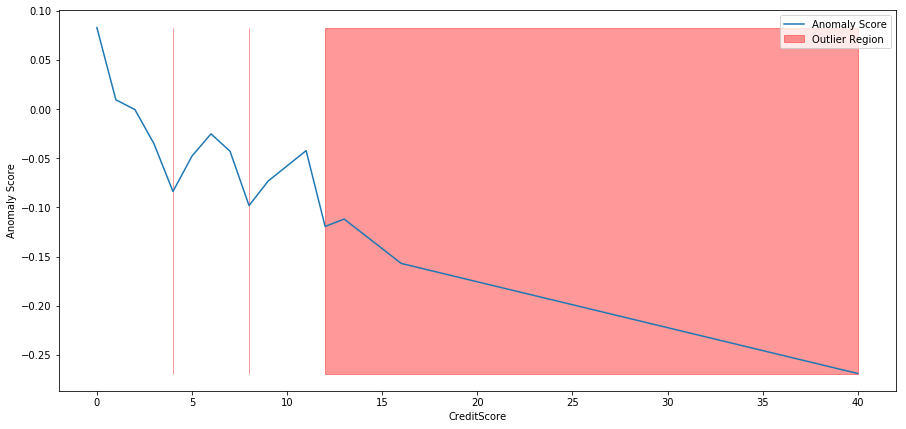

In [141]:
score_split_anomaly(data, numeric_data[3])

## ZipCode

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


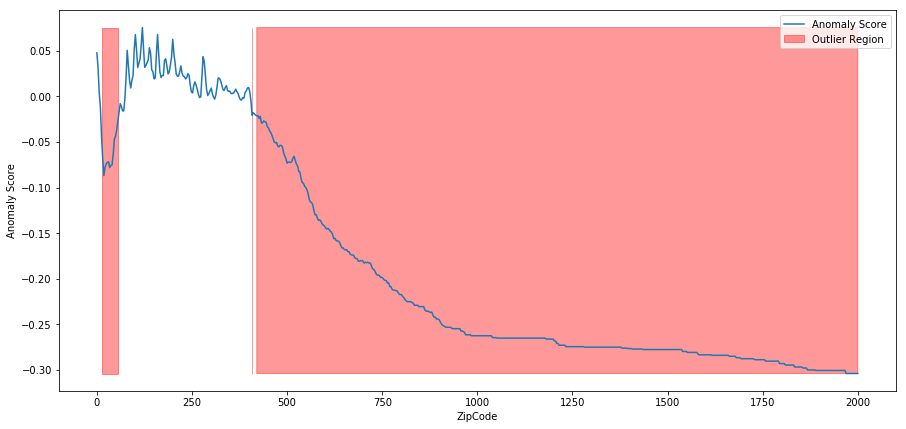

In [142]:
score_linspace_anomaly(data, numeric_data[4])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


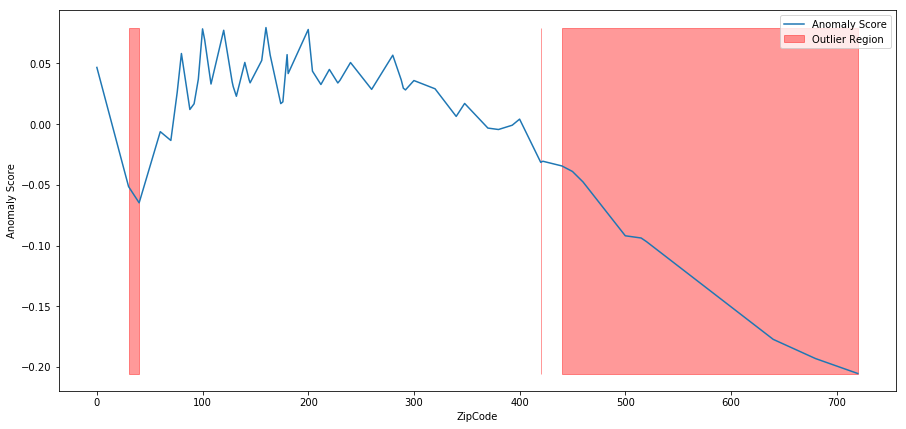

In [143]:
score_split_anomaly(data, numeric_data[4])

## Income

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


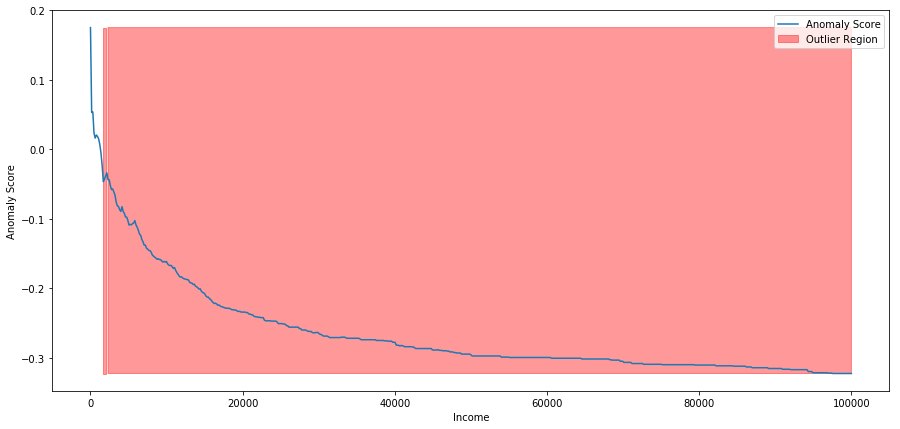

In [144]:
score_linspace_anomaly(data, numeric_data[5])

/home/janniechang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


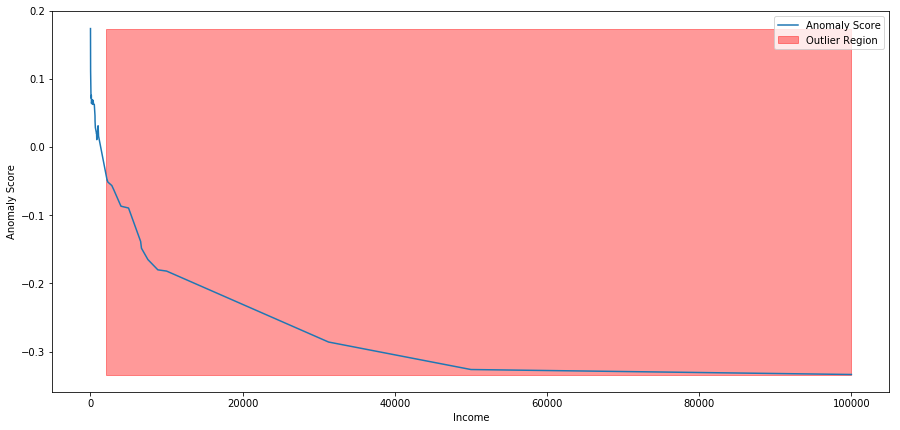

In [145]:
score_split_anomaly(data, numeric_data[5])